In [1]:
import time, os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from get_dataset import load_dataset
from get_dataset import get_trainset
from get_dataset import scaler_user
from embedding import embedding_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

(13392, 11)


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
created_time = int(time.time()) 
chest_list, chest_dataset = load_dataset('exercise')
user_dataset = scaler_user(load_dataset('user'))

num_chest_dataset = len(chest_dataset[0])
num_user_dataset = len(user_dataset[0])

In [3]:
user_train_input, chest_train_input, chest_label = get_trainset(user_dataset, chest_list, chest_dataset)
print(np.shape(user_train_input),np.shape(chest_train_input),np.shape(chest_label))

(200880, 11) (200880,) (200880,)


In [4]:
model = embedding_model(num_user_dataset,num_chest_dataset)
model.summary()
plot_model(model, show_shapes=True)

cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.00001, patience=5, verbose=1, mode='min',
    baseline=None, restore_best_weights=True
)

KerasTensor(type_spec=TensorSpec(shape=(None, 11), dtype=tf.float32, name=None), name='multiply/mul:0', description="created by layer 'multiply'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 11)        176         ['item_input[0][0]']             
                                                                                                  
 user_unput (InputLayer)        [(None, 11)]         0           []                               
                                                                                                  
 flatten_1 (Flatten)            (None, 11)    

In [5]:
x_train, x_val, y_train, y_val, label_train, label_val = train_test_split(user_train_input, chest_train_input, chest_label, test_size=0.2, random_state=2022)

In [6]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(label_train))

(160704, 11)
(160704,)
(160704,)


In [7]:
loss = 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate = 0.0003), loss=loss, metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])
history = model.fit([x_train, y_train], label_train, epochs=200, batch_size = 128, validation_data=([x_val, y_val], label_val),callbacks=[cb])

Epoch 1/200
1256/1256 [==============================] - 7s 4ms/step - loss: 0.5520 - precision: 0.6451 - recall: 0.0499 - auc: 0.6504 - val_loss: 0.4810 - val_precision: 0.6101 - val_recall: 0.4021 - val_auc: 0.7801
Epoch 2/200
1256/1256 [==============================] - 5s 4ms/step - loss: 0.4677 - precision: 0.6261 - recall: 0.4170 - auc: 0.7947 - val_loss: 0.4615 - val_precision: 0.6343 - val_recall: 0.4191 - val_auc: 0.8008
Epoch 3/200
1256/1256 [==============================] - 5s 4ms/step - loss: 0.4619 - precision: 0.6328 - recall: 0.4396 - auc: 0.8011 - val_loss: 0.4597 - val_precision: 0.6275 - val_recall: 0.4608 - val_auc: 0.8028
Epoch 4/200
1256/1256 [==============================] - 5s 4ms/step - loss: 0.4598 - precision: 0.6337 - recall: 0.4471 - auc: 0.8035 - val_loss: 0.4585 - val_precision: 0.6260 - val_recall: 0.4706 - val_auc: 0.8044
Epoch 5/200
1256/1256 [==============================] - 5s 4ms/step - loss: 0.4578 - precision: 0.6361 - recall: 0.4535 - auc: 0.80

In [8]:
os.mkdir(f"model/{loss}_{created_time}")
model.save(f'model/{loss}_{created_time}/exercise_model.h5')

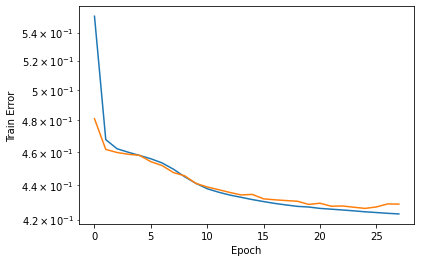

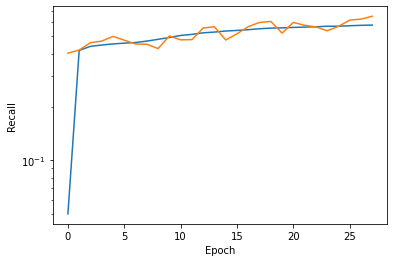

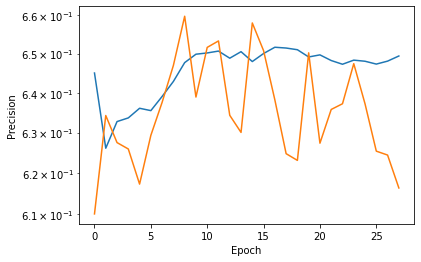

In [9]:
plt.figure()
pd.Series(history.history['loss']).plot(logy=True)
pd.Series(history.history['val_loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.savefig(f"model/{loss}_{created_time}/train_error.png")
plt.show()

plt.figure()
pd.Series(history.history['recall']).plot(logy=True)
pd.Series(history.history['val_recall']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.savefig(f"model/{loss}_{created_time}/train_recall.png")
plt.show()

plt.figure()
pd.Series(history.history['precision']).plot(logy=True)
pd.Series(history.history['val_precision']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.savefig(f"model/{loss}_{created_time}/train_precisino.png")
plt.show()